In [1]:
from random import randint
import statistics
import numpy as np
import matplotlib.pyplot as plt

def kuroAdd(results, skill, gimmiku, tn):
    count = skill;
    for i in range(len(results)):
        if(results[i] != 4):
            count += results[i]
        if('expertise' in gimmiku):
            if(results[i] == 4 and i+1 <= gimmiku['expertise']):
                count += results[i]
    if('focus' in gimmiku):
        count+= gimmiku['focus']*2
    if('accuracy' in gimmiku and count >= tn):
        count += gimmiku['accuracy']*4
    return count

In [2]:
def expertise(results, gimmiku):
    results.sort()
    for i in range(gimmiku['expertise']):
        if(i<len(results)):
            if(results[i] != 6):
                result = randint(1,6)
                results[i] = result;
                while(result == 6):
                    result = randint(1,6)
                    results.append(result)


In [3]:
          
def kuroRoll(characteristic, gimmiku):
    results = []
    startingMastery = 0
    if('mastery' in gimmiku):
        startingMastery = gimmiku['mastery']
    if('boost' in gimmiku):
        dicePool = characteristic + gimmiku['boost']
    else:
        dicePool = characteristic
    for i in range(dicePool):
        result = randint(1,6)
        results.append(result)
        if('mastery' in gimmiku and gimmiku['mastery'] > 0 and result == 5):     
            result = randint(1,6)
            results.append(result)
            gimmiku['mastery']-= 1
        while(result == 6):
            result = randint(1,6)
            results.append(result)
    if('expertise' in gimmiku):
        expertise(results, gimmiku)
    if('mastery' in gimmiku):
        gimmiku['mastery'] = startingMastery
        
    return results

In [12]:
def simulateRolls(characteristic, skill, gimmiku, sampleSize):
    tn = 12
    scores = []
    for i in range(sampleSize):
        dieRolls = kuroRoll(characteristic, gimmiku)
        scores.append(kuroAdd(dieRolls, skill, gimmiku, tn))
    return scores

In [14]:
def generateGimmikuDict(characteristic, skill, gimmikuLevel, runs):
    gimmikuNames = ['boost', 'mastery', 'focus', 'expertise', 'accuracy', 'No Gimmiku']
    gimmikuResults = {}
    for gimmikuName in gimmikuNames:
        gimmikuResults[gimmikuName] = simulateRolls(characteristic, skill, {gimmikuName : gimmikuLevel}, runs)
    return gimmikuResults

In [84]:
def printGimmikuTable(gimmikuResults):
    print("gimmiku    average  max  min median mode  standard deviation")
    for gimmiku, gimmikuResult in gimmikuResults.items():
        stats = {'gimmiku' : gimmiku, 'mean': round(statistics.mean(gimmikuResult), 3), 'max' : max(gimmikuResult), 'min': min(gimmikuResult), 'median':statistics.median(gimmikuResult), 'mode': statistics.mode(gimmikuResult), 'stdev' :statistics.stdev(gimmikuResult)}
        print("%(gimmiku)10s %(mean)7.3f %(max)3d %(min)3d %(median)6d  %(mode)4d   %(stdev)4.3f" % stats)

In [85]:
def displayGimmikuHistoGrams(gimmikuResults):
    for gimmiku, gimmikuResult in gimmikuResults.items():
        plt.hist(gimmikuResult, bins=np.arange(min(gimmikuResult), max(gimmikuResult)+1))
        plt.title(gimmiku)
        plt.show()

In [86]:
gimmikuResults = generateGimmikuDict(2,5,1,100000)
printGimmikuTable(gimmikuResults)

gimmiku    average  max  min median mode  standard deviation
     boost  15.210  64   5     14    13   5.895
   mastery  12.829  69   5     12     8   5.695
     focus  13.778  61   7     13    12   4.809
 expertise  14.161  63   6     13    12   5.576
  accuracy  13.559  58   5     11    10   6.465
No Gimmiku  11.804  58   5     11    10   4.833


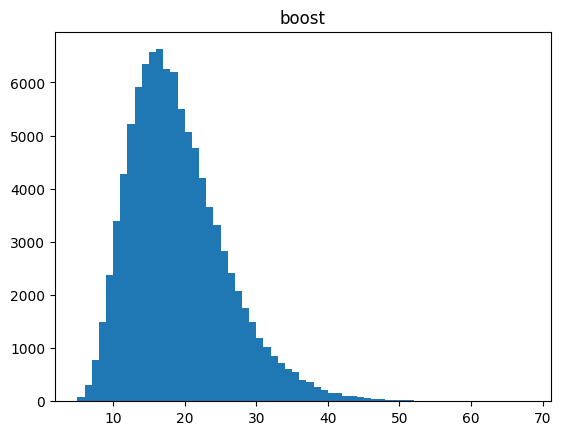

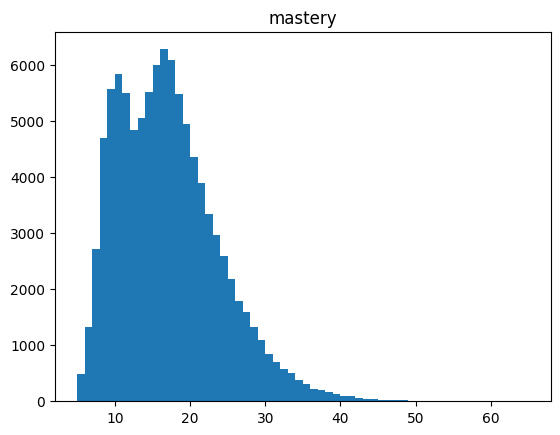

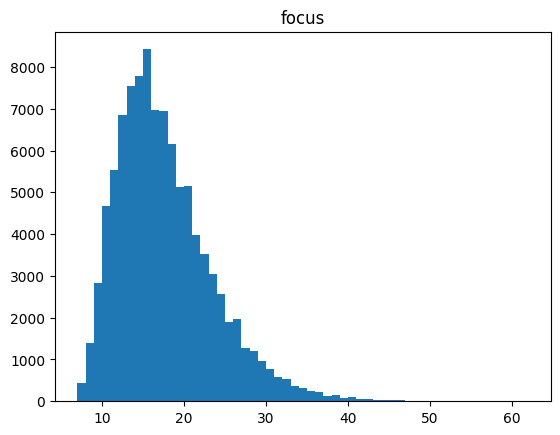

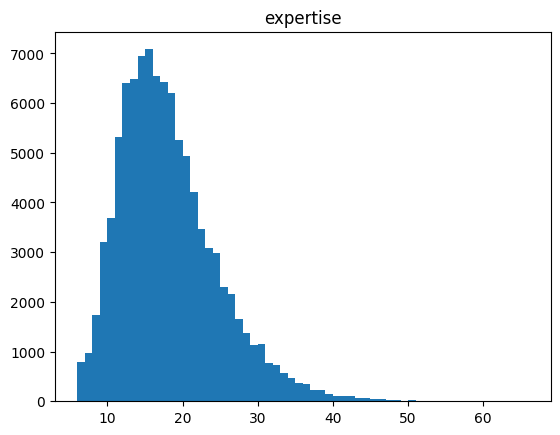

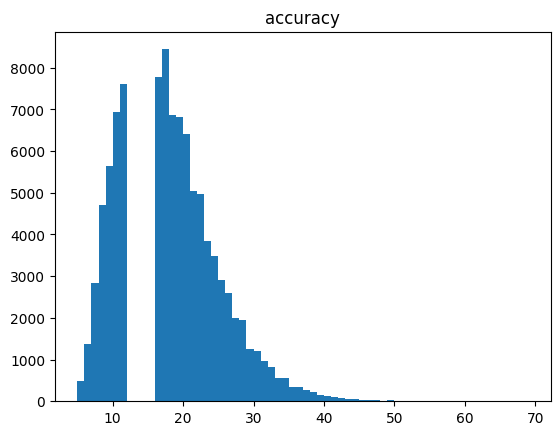

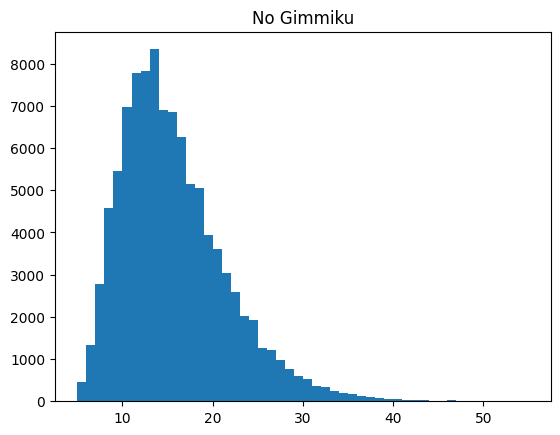

In [76]:
displayGimmikuHistoGrams(gimmikuResults)